In [294]:
import pandas as pd
import numpy as np

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [296]:
data = pd.read_csv('passwordData.csv', on_bad_lines='skip')

In [297]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [298]:
data.info

<bound method DataFrame.info of             password  strength
0           kzde5577         1
1           kino3434         1
2          visi7k1yr         1
3           megzy123         1
4        lamborghin1         1
...              ...       ...
669635    10redtux10         1
669636     infrared1         1
669637  184520socram         1
669638     marken22a         1
669639      fxx4pw4g         1

[669640 rows x 2 columns]>

In [299]:
data.columns

Index(['password', 'strength'], dtype='object')

In [300]:
data.isnull().sum() #Checking Null Values

password    1
strength    0
dtype: int64

In [301]:
data.dropna(inplace = True) #Dropping null value

In [302]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [303]:
data.duplicated().sum() #Checking duplicates

0

In [304]:
data.dtypes #Checking Data Types

password    object
strength     int64
dtype: object

In [305]:
data['strength'].unique() #Checking unique values in 'strength' Column

array([1, 2, 0], dtype=int64)

In [306]:
type(data['password'][0]) #data type in password columns stored as

str

In [307]:
data['password'].str.isdigit().sum()  #to check in the password field whether only numeric values are present

108

In [308]:
data[data['password'].str.isdigit()]

,password,strength
5597,445566,0
6263,1995151,0
27970,5252752,0
34293,2091024,0
41338,603030,0
...,...,...
634830,000000,0
635587,11,0
649848,1050,0
652957,363761,0


In [309]:
data[data['password'].str.isalpha()] #to check in the password field whether only alphabetic values are present

,password,strength
231,gtlek,0
4602,trcske,0
6096,jijik,0
6500,piccolo,0
10740,Stphane,0
...,...,...
656049,vntm,0
657578,fuckyou,0
666278,mueco,0
666328,PomarancaÇ,1


In [310]:
data[data['password'].str.isupper()] #Checking uppercase values only

,password,strength
268,AS0130066,1
269,QWERTY0011,1
323,YADHJIGSAWS11,1
346,IRZA98,0
486,PEPITO00,1
...,...,...
669458,ARNAV_KUSHI,1
669460,36802907A,1
669549,MARLENY2090,1
669557,RHBDJQHJU25,1


In [311]:
data[data['password'].str.islower()] #checking lowercases only

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [312]:
data[data['password'].str.contains('[A-Z]')] #Checking uppercase present anywhere

,password,strength
5,AVYq1lDE4MgAZfNt,2
13,WUt9IZzE0OQ7PkNE,2
22,klara-tershina3H,2
41,pHyqueDIyNQ8vmhb,2
47,TyWM72UNEex8Q8Y,2
...,...,...
669606,Felidae_blckPanther001,2
669610,0933674790MAK,1
669612,MeRAquFABUZy226,2
669619,tYAam8zg3Mg2AZ7a,2


In [313]:
pattern = r'^(?=.*[A-Z])(?=.*[a-z])(?=.*[\W_]).*$'
data[data['password'].str.contains(pattern)] #Checking passwords with uppercase, lowercase and special case combined

,password,strength
22,klara-tershina3H,2
60,khmer100.03278&?><Mnb,2
65,Iamthelegend1!,2
242,xW8-3w7-MFB-CKH,2
378,GGmm26120904..,2
...,...,...
669233,Codificando10~,2
669391,FBsPAs<DXp#nJsY~,2
669396,1qaz2wsx!QAZ@WSX,2
669554,gRAPEHORSE_289,2


In [314]:
data[data['password'].str.isalnum()] #Checking alpha-numeric values only

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [315]:
data[data['password'].str.istitle()] #Checking passwords starting with capital letters

,password,strength
65,Iamthelegend1!,2
369,Staterkom20081993,2
377,Oshity07142014,2
464,Scipio21152030067254,2
546,1A2Z3E4R,1
...,...,...
669079,Kustyk33935432,2
669157,28091974Zezinho,2
669199,City&Colour241091,2
669233,Codificando10~,2


In [316]:
import string #String itself is a package in python

In [317]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [318]:
def specialChar(specialCharacter): #Special characters present in password can also be checked by using string package and defining function 
    for char in specialCharacter:
        if char in string.punctuation:
            return 1
        else:
            pass

In [319]:
data[data['password'].apply(specialChar) == 1] #Checking passwords with special characer present in them

,password,strength
20,elyass15@ajilent-ci,2
22,klara-tershina3H,2
44,olmaz.,0
50,ok>bdk,0
60,khmer100.03278&?><Mnb,2
...,...,...
669554,gRAPEHORSE_289,2
669606,Felidae_blckPanther001,2
669618,juanpaganini588@gmail.com,2
669622,weslley.06888524,2


In [320]:
data['length'] = data['password'].str.len() #Storing length of passwords in length column

In [321]:
data['length']

0          8
1          8
2          9
3          8
4         11
          ..
669635    10
669636     9
669637    12
669638     9
669639     8
Name: length, Length: 669639, dtype: int64

In [322]:
def lowerCaseElementsPresentInPassword(row): #getting length of lowerCase characters
    count = 0                               #divining lower char length by total length to remove outliers
    total_length = len(row)
    for char in row:
        if char.islower():
            count += 1
    return count/total_length

In [323]:
data['lowerCase_freq'] = round(data['password'].apply(lowerCaseElementsPresentInPassword), 2)

In [324]:
data['lowerCase_freq']

0         0.50
1         0.50
2         0.78
3         0.62
4         0.91
          ... 
669635    0.60
669636    0.89
669637    0.50
669638    0.78
669639    0.75
Name: lowerCase_freq, Length: 669639, dtype: float64

In [325]:
def upperCaseElementsPresentInPassword(row): #getting length of upperCase characters
    count = 0                               #divining upper char length by total length to remove outliers
    total_length = len(row)
    for char in row:
        if char.isupper():
            count += 1
    return count/total_length

In [326]:
data['upperCase_freq'] = round(data['password'].apply(upperCaseElementsPresentInPassword), 2)

In [327]:
data['upperCase_freq']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
669635    0.0
669636    0.0
669637    0.0
669638    0.0
669639    0.0
Name: upperCase_freq, Length: 669639, dtype: float64

In [328]:
def digit_freq(row):                         #getting length of digits
    count = 0                                #divining digit length by total length to remove outliers
    total_length = len(row)
    for char in row:
        if char.isdigit():
            count += 1
    return count/total_length

In [329]:
data['digit_freq'] = round(data['password'].apply(digit_freq), 2)

In [330]:
data['digit_freq']

0         0.50
1         0.50
2         0.22
3         0.38
4         0.09
          ... 
669635    0.40
669636    0.11
669637    0.50
669638    0.22
669639    0.25
Name: digit_freq, Length: 669639, dtype: float64

In [331]:
data.head()

,password,strength,length,lowerCase_freq,upperCase_freq,digit_freq
0,kzde5577,1,8,0.50,0.0,0.50
1,kino3434,1,8,0.50,0.0,0.50
2,visi7k1yr,1,9,0.78,0.0,0.22
3,megzy123,1,8,0.62,0.0,0.38
4,lamborghin1,1,11,0.91,0.0,0.09


In [332]:
def special_char_freq(row):        #getting length of special characters, dividing by total length to remove outliers
    count = 0
    total_length = len(row)
    for char in row:
        if not char.isalpha() and not char.isdigit():
            count += 1
    return count/total_length

In [333]:
data['specialChar_freq'] = round(data['password'].apply(special_char_freq), 2)

In [334]:
data['specialChar_freq']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
669635    0.0
669636    0.0
669637    0.0
669638    0.0
669639    0.0
Name: specialChar_freq, Length: 669639, dtype: float64

In [335]:
data.head(2)

,password,strength,length,lowerCase_freq,upperCase_freq,digit_freq,specialChar_freq
0,kzde5577,1,8,0.5,0.0,0.5,0.0
1,kino3434,1,8,0.5,0.0,0.5,0.0


In [336]:
data[["strength", "length"]].groupby(["strength"]).agg(['min','max','mean','median'])
#lower strength has maximum password length of 7, lower mean and lower median
#We can coclude thelonger length makes password more stronger

length                       
            min  max       mean median
strength                              
0             1    7   6.549604    7.0
1             8   13   9.618964    9.0
2            14  220  15.932497   16.0

In [337]:
columns = ['length', 'lowerCase_freq', 'upperCase_freq', 'digit_freq', 'specialChar_freq']

In [338]:
for cols in columns:
    print(data[[cols, 'strength']].groupby(['strength']).agg(['min','max','mean','median']))
    print('\n\n')

         length                       
            min  max       mean median
strength                              
0             1    7   6.549604    7.0
1             8   13   9.618964    9.0
2            14  220  15.932497   16.0



         lowerCase_freq                       
                    min   max      mean median
strength                                      
0                   0.0  1.00  0.708386   0.71
1                   0.0  0.92  0.630223   0.67
2                   0.0  0.93  0.423154   0.40



         upperCase_freq                       
                    min   max      mean median
strength                                      
0                   0.0  1.00  0.012328   0.00
1                   0.0  0.92  0.008456   0.00
2                   0.0  0.90  0.367585   0.43



         digit_freq                       
                min   max      mean median
strength                                  
0               0.0  1.00  0.275718   0.29
1               0.0  

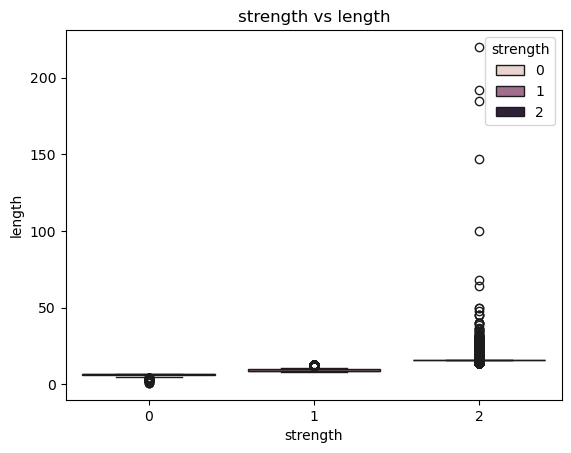

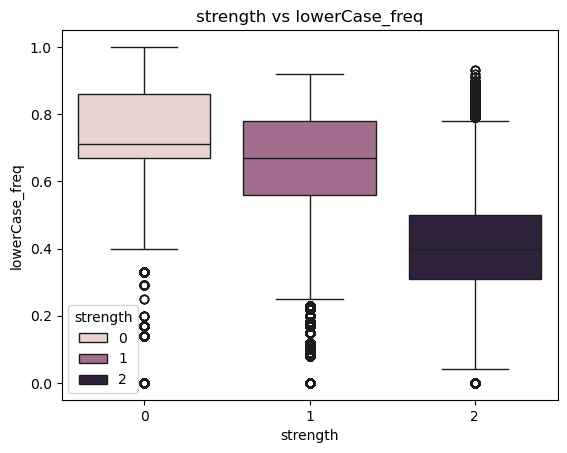

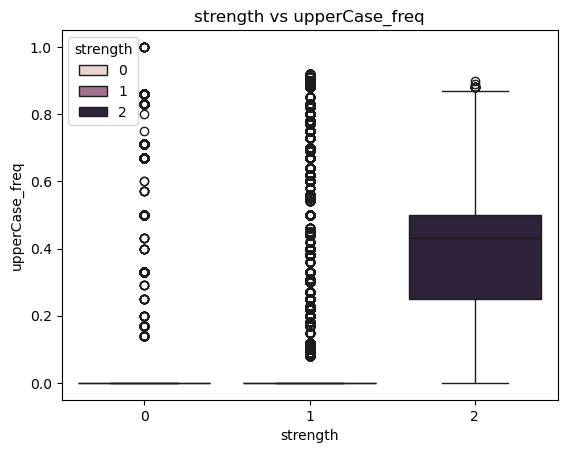

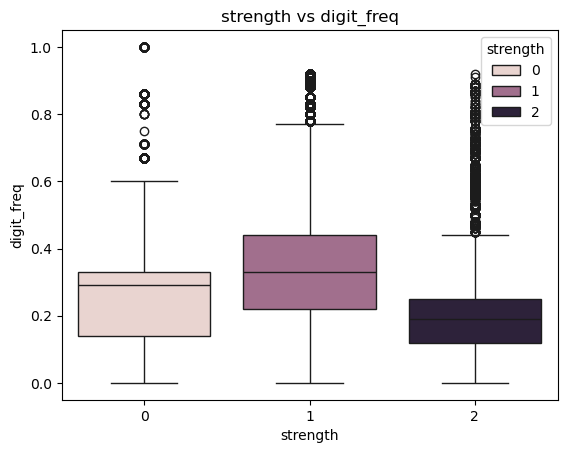

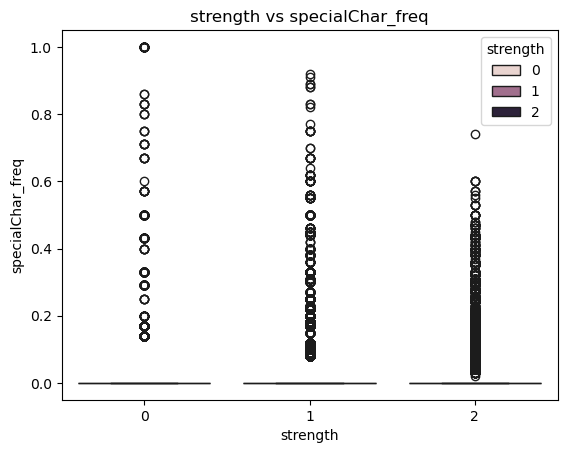

In [339]:
columns = ['length', 'lowerCase_freq', 'upperCase_freq', 'digit_freq', 'specialChar_freq']
for cols in columns:
    sns.boxplot(data = data, x = 'strength', y = cols, hue = 'strength')
    plt.title(f'strength vs {cols}')
    plt.show()

In [340]:
data.isnull().sum()  #Checking any null values

password            0
strength            0
length              0
lowerCase_freq      0
upperCase_freq      0
digit_freq          0
specialChar_freq    0
dtype: int64

In [341]:
data.head(1)

,password,strength,length,lowerCase_freq,upperCase_freq,digit_freq,specialChar_freq
0,kzde5577,1,8,0.5,0.0,0.5,0.0


In [342]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [343]:
vectorizer = TfidfVectorizer(analyzer = 'char')

In [344]:
x = list(data['password'])

In [345]:
X = vectorizer.fit_transform(x)

In [346]:
X

<669639x153 sparse matrix of type '<class 'numpy.float64'>'
	with 5645405 stored elements in Compressed Sparse Row format>

In [347]:
X.shape

(669639, 153)

In [348]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.56689905,
       0.        , 0.59130334, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.28563145,
       0.22168958, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.29224677, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [349]:
df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

In [350]:
df

,,,,,,,,,,,...,ÿ,œ,ƒ,—,‚,‡,…,‹,›,™
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [351]:
df[['length', 'lowerCase_freq', 'upperCase_freq', 'digit_freq', 'specialChar_freq']] = data[['length', 'lowerCase_freq', 'upperCase_freq', 'digit_freq', 'specialChar_freq']]

In [352]:
df

,,,,,,,,,,,...,‡,…,‹,›,™,length,lowerCase_freq,upperCase_freq,digit_freq,specialChar_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.50,0.0,0.50,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.50,0.0,0.50,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.78,0.0,0.22,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.62,0.0,0.38,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,0.91,0.0,0.09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.83,0.0,0.17,0.0
669635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.60,0.0,0.40,0.0
669636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.89,0.0,0.11,0.0
669637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.50,0.0,0.50,0.0


In [353]:
df['strength'] = data['strength']

In [354]:
df

,,,,,,,,,,,...,…,‹,›,™,length,lowerCase_freq,upperCase_freq,digit_freq,specialChar_freq,strength
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.50,0.0,0.50,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.50,0.0,0.50,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.78,0.0,0.22,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.62,0.0,0.38,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.91,0.0,0.09,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.83,0.0,0.17,0.0,0.0
669635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.60,0.0,0.40,0.0,1.0
669636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.89,0.0,0.11,0.0,1.0
669637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.50,0.0,0.50,0.0,1.0


In [355]:
df.isnull().sum()

                   0
                   0
                   0
                   0
                   0
                   ..
lowerCase_freq      1
upperCase_freq      1
digit_freq          1
specialChar_freq    1
strength            1
Length: 159, dtype: int64

In [356]:
df.dropna(inplace = True)

In [357]:
df.isnull().sum()

                   0
                   0
                   0
                   0
                   0
                   ..
lowerCase_freq      0
upperCase_freq      0
digit_freq          0
specialChar_freq    0
strength            0
Length: 159, dtype: int64

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669638 entries, 0 to 669638
Columns: 159 entries,  to strength
dtypes: float64(159)
memory usage: 817.4 MB


In [359]:
from sklearn.model_selection import train_test_split

In [360]:
X = df.drop(['strength','upperCase_freq', 'digit_freq', 'specialChar_freq'], axis = 1)

In [405]:
X

,,,,,,,,,,,...,ƒ,—,‚,‡,…,‹,›,™,length,lowerCase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.50
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.50
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.78
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.62
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.83
669635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.60
669636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.89
669637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.50


In [406]:
y = df['strength']
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
669634    0.0
669635    1.0
669636    1.0
669637    1.0
669638    1.0
Name: strength, Length: 669638, dtype: float64

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [363]:
from sklearn.linear_model import LogisticRegression

In [384]:
lr = LogisticRegression()

In [385]:
lr.fit(X_train, y_train)

C:\Users\pokhr\AllAnaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [386]:
y_pred = lr.predict(X_test)

In [387]:
from collections import Counter

In [388]:
Counter(y_pred)

Counter({1.0: 99510, 0.0: 17736, 2.0: 16682})

In [389]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [390]:
accuracy_score(y_test, y_pred)

0.999910399617705

In [391]:
confusion_matrix(y_test, y_pred)

array([[17736,     7,     0],
       [    0, 99503,     5],
       [    0,     0, 16677]], dtype=int64)

In [392]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17743
         1.0       1.00      1.00      1.00     99508
         2.0       1.00      1.00      1.00     16677

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



In [433]:
def predic():
    password = input("Please enter password: ")
    array = np.array([password])
    matrix = vectorizer.transform(array)
    length = len(password)
    lowerCase_freq = len([char for char in password if char.islower()])/length

    
    tfidf_features = matrix.toarray()
    additional_features = np.array([[length, lowerCase_freq]])
   
    new_matrix = np.append(tfidf_features, additional_features).reshape(1,155)

    result = lr.predict(new_matrix)
    
    if result == 0:
        return "Password is Weak"
        
    elif result == 1:
        return "Password is Moderate"
        
    else:
        return "Password is Strong"
  

In [434]:
predic()

Please enter password:  abc


C:\Users\pokhr\AllAnaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Password is Weak'

In [436]:
predic()

Please enter password:  Abcabg@123


C:\Users\pokhr\AllAnaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Password is Moderate'

In [437]:
predic()

Please enter password:  Abc@12367tvgdh


C:\Users\pokhr\AllAnaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Password is Strong'